In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
with open("D:/struc2vec/SOB_2017_7_directed.emb") as f:
    first_line = f.readline().strip()
    total, dimension = map(int, first_line.split(" "))
    embedding = np.zeros([total, dimension])
    mapping = {}
    reverse = {}
    for line in f:
        parts = line.strip().split(" ")
        id = int(parts[0])
        vec = map(float, parts[1:])
        mapping[id] = len(mapping)
        reverse[mapping[id]] = id
        embedding[mapping[id]] = vec

In [3]:
embedding

array([[ 0.323887, -0.987987, -0.04173 , ..., -0.079532,  0.091342,
         0.805026],
       [-0.149334, -0.595552, -0.037078, ..., -0.211378, -0.29202 ,
         0.329325],
       [ 0.426059, -0.627848, -0.061174, ...,  0.056817, -0.368909,
         0.440477],
       ..., 
       [ 0.1874  , -0.774727,  0.332312, ...,  0.482196, -0.326515,
         0.459867],
       [ 0.336593, -0.088287,  0.140773, ..., -0.63239 ,  0.078187,
         0.262293],
       [ 0.104294, -0.421317,  0.096476, ...,  0.055061, -0.290791,
         0.576926]])

In [4]:
from sklearn.decomposition import *
from sklearn.manifold import *

In [5]:
kpca = KernelPCA(n_components=2, kernel='rbf')
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
se = SpectralEmbedding(n_components=2)
mds = MDS(n_components=2)
if embedding.shape[1] > 2:
    reduced = pca.fit_transform(embedding)
else:
    reduced = embedding

In [6]:
reduced

array([[-1.22710769, -0.08600634],
       [-1.20927849,  0.06318753],
       [-1.21004496, -0.05814562],
       ..., 
       [-1.14727299,  0.02686072],
       [ 0.33523612,  0.74206809],
       [-0.93699981, -0.27903806]])

In [7]:
import matplotlib.pyplot as plt

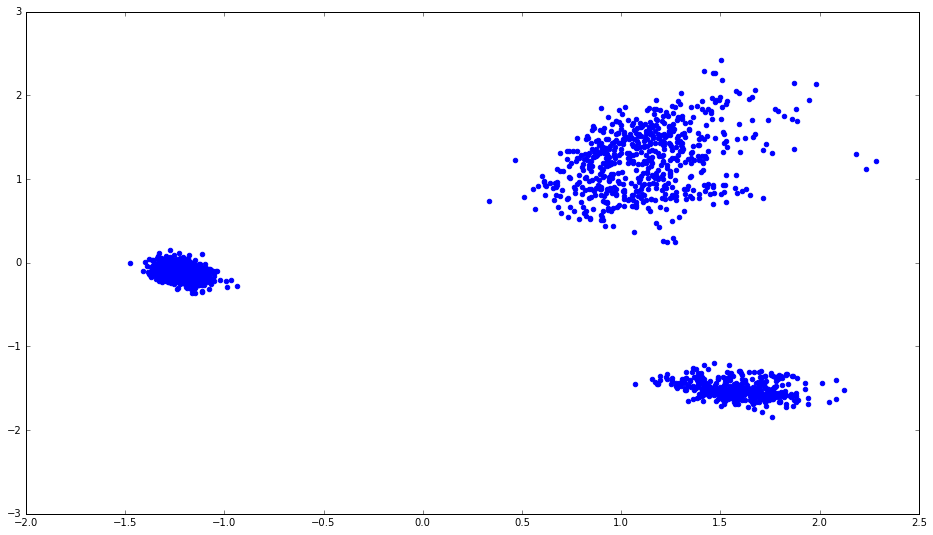

In [8]:
fig = plt.figure(1, figsize=(16, 9), facecolor="white")
plt.clf()

plt.scatter(reduced[:, 0], reduced[:, 1], color="blue")

In [9]:
rank_df = pd.read_pickle("rank.pickle")
r = rank_df[(2017,7)]
highlight = r[r < 200].index.map(lambda i: mapping[i])

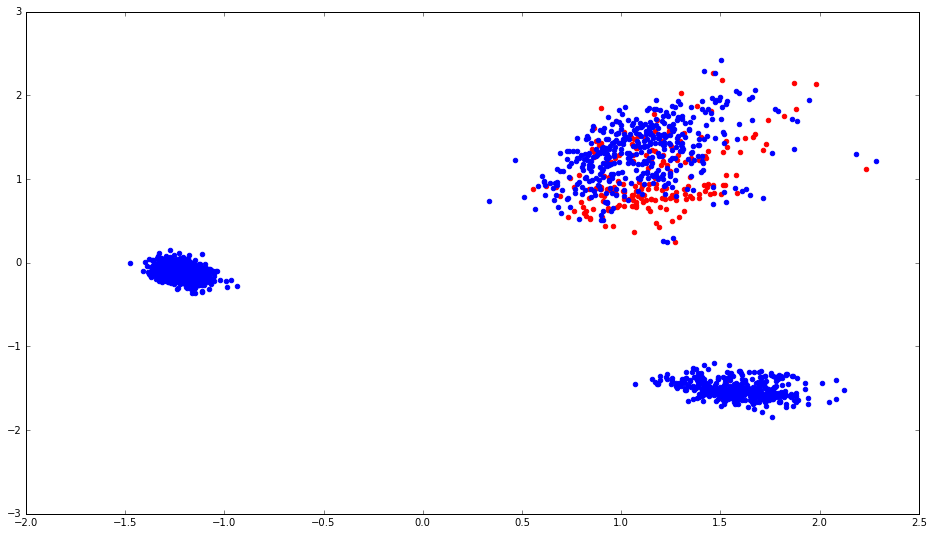

In [11]:
fig = plt.figure(1, figsize=(16, 9), facecolor="white")
plt.clf()

core = reduced[highlight]
other = reduced[map(lambda i: i not in highlight, range(reduced.shape[0]))]

plt.scatter(core[:, 0], core[:, 1], color="red")

plt.scatter(other[:, 0], other[:, 1], color="blue")

In [39]:
df = pd.DataFrame(reduced, columns=['x', 'y'])

In [40]:
df1 = df[df.x < 0.0]

In [41]:
df2 = df[(df.x > 0.0)&(df.y > 0)]

In [42]:
df3 = df[(df.x > 0.0)&(df.y < 0)]

In [43]:
data = pd.read_pickle("SOB_2017_7.pickle")
n_devs = len(data['id2email'])
indegree = pd.Series([0.0] * n_devs)
outdegree = pd.Series([0.0] * n_devs)

for k, vs in data['directed'].items():
    for v, w in vs.items():
        outdegree[k] += w
        indegree[v] += w

In [44]:
print indegree[df1.index.map(lambda i: reverse[i])].describe()
print outdegree[df1.index.map(lambda i: reverse[i])].describe()

count    1114.000000
mean        0.062837
std         1.657459
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        55.000000
dtype: float64
count    1114.000000
mean        2.480251
std         4.451603
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        65.000000
dtype: float64


In [45]:
print indegree[df2.index.map(lambda i: reverse[i])].describe()
print outdegree[df2.index.map(lambda i: reverse[i])].describe()

count     619.000000
mean       27.806139
std       118.778306
min         0.000000
25%         0.000000
50%         2.000000
75%        13.000000
max      2181.000000
dtype: float64
count    619.000000
mean      20.617124
std       46.829137
min        0.000000
25%        4.000000
50%        9.000000
75%       20.000000
max      725.000000
dtype: float64


In [46]:
print indegree[df3.index.map(lambda i: reverse[i])].describe()
print outdegree[df3.index.map(lambda i: reverse[i])].describe()

count    428.000000
mean       0.985981
std        3.796928
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       65.000000
dtype: float64
count    428.000000
mean       5.091121
std        6.509846
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       65.000000
dtype: float64
